In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pycalphad import Database, equilibrium 
import pycalphad.variables as v
import random

In [2]:
database = Database('FeMnC_11Dju.tdb')
print(f"Possible phases in database are {list(database.phases.keys())}")
phases = ['FCC_A1', 'BCC_A2', 'HCP_A3',]
components = ['FE', 'C', 'MN', 'VA']
print(f"Phases taken into consideration are {phases}")
print(f"Components taken into consideration are {components}")
total_moles = 1

Possible phases in database are ['LIQUID', 'FCC_A1', 'BCC_A2', 'HCP_A3', 'CBCC_A12', 'CUB_A13', 'DIAMOND_A4', 'GRAPHITE', 'CEMENTITE_D011', 'M7C3_D101', 'M23C6_D84', 'M5C2']
Phases taken into consideration are ['FCC_A1', 'BCC_A2', 'HCP_A3']
Components taken into consideration are ['FE', 'C', 'MN', 'VA']


In [3]:
def get_ms_temp(c, mn):
    #print(f"Fractions received: {c}, {mn}, {1-c-mn}")
    M_Fe = 55.85
    M_Car = 12.01
    M_Mn = 54.94
    denominator = (1 - c - mn)*M_Fe + c*M_Car + mn*M_Mn
    #w_Fe = ((1 - c - mn)*M_Fe/denominator)*100      #not required
    w_C = (c*M_Car/denominator)*100
    w_Mn = (mn*M_Mn/denominator)*100
    #print("w_C", w_C)
    #print("w_Mn", w_Mn)
    return (812 - 423*w_C - 30.4*w_Mn)

def get_martensite_fraction(ms_temp, quench_temp = 298):
    return 1 - np.exp(-0.011*(ms_temp - quench_temp))

def get_ra_fraction(austenite_frac, martensite_frac):
    return austenite_frac*(1 - martensite_frac)

In [4]:
def get_sfe(delta_g): # in mJ per m^2
    rho = 4/(135174.14784) # atomic density of the {111} planes
    return (2*rho*(delta_g + 37) + 2*0.014)*1000

In [5]:
temp_range = [873 + 50*i for i in range(1, 16)] #45
print(f"Possible temperatures taken in consideration are {temp_range}")
print(f"Number of temperature values taken in consideration = {len(temp_range)}")
pressure = 101325 # atmospheric pressure

Possible temperatures taken in consideration are [923, 973, 1023, 1073, 1123, 1173, 1223, 1273, 1323, 1373, 1423, 1473, 1523, 1573, 1623]
Number of temperature values taken in consideration = 15


In [6]:
# Generating combinations of components/elements to check
elements = ['FE', 'C', 'MN']
num_samples = 10
valid_combinations = []

for _ in range(num_samples):
    w_c_val = random.uniform(0.05, 0.20)
    w_mn_val = random.uniform(5, 10)  
    w_fe_val = 100.0 - w_c_val - w_mn_val
    M_Fe = 55.85
    M_Car = 12.01
    M_Mn = 54.94
    denominator = (w_c_val/M_Car) + (w_fe_val/M_Fe) + (w_mn_val/M_Mn)
    fe_val = (w_fe_val/M_Fe)/denominator
    c_val = (w_c_val/M_Car)/denominator
    mn_val = (w_mn_val/M_Mn)/denominator
    valid_combinations.append({'FE': round(fe_val, 3), 'C': round(c_val, 3), 'MN': round(mn_val, 3)})

print(f"Generated {len(valid_combinations)} random valid combinations.")

for combination in valid_combinations:
    print(combination)

Generated 10 random valid combinations.
{'FE': 0.898, 'C': 0.003, 'MN': 0.098}
{'FE': 0.895, 'C': 0.009, 'MN': 0.096}
{'FE': 0.917, 'C': 0.007, 'MN': 0.075}
{'FE': 0.903, 'C': 0.006, 'MN': 0.091}
{'FE': 0.897, 'C': 0.006, 'MN': 0.096}
{'FE': 0.918, 'C': 0.004, 'MN': 0.078}
{'FE': 0.895, 'C': 0.005, 'MN': 0.1}
{'FE': 0.915, 'C': 0.004, 'MN': 0.08}
{'FE': 0.907, 'C': 0.008, 'MN': 0.085}
{'FE': 0.938, 'C': 0.005, 'MN': 0.056}


{'FE': 0.898, 'C': 0.003, 'MN': 0.098} 923
Austenite frac 0.9842862145780081 || MS temp 486.5541007343599 || Martensite frac 0.8743299060896486 || RA frac 0.12369534102068261 || delta G fcc -8279.987513422311 || delta G hcp None || Phases at T ['FCC_A1' 'BCC_A2' '' ''] || Phases at 298K ['FCC_A1' 'BCC_A2' 'FCC_A1' '']
{'FE': 0.898, 'C': 0.003, 'MN': 0.098} 973
Austenite frac 0.9999999998211841 || MS temp 490.37463717370207 || Martensite frac 0.8795018656701021 || RA frac 0.1204981343083509 || delta G fcc -8279.987513422311 || delta G hcp None || Phases at T ['FCC_A1' '' '' ''] || Phases at 298K ['FCC_A1' 'BCC_A2' 'FCC_A1' '']
{'FE': 0.898, 'C': 0.003, 'MN': 0.098} 1023
Austenite frac 0.9999999998478692 || MS temp 490.37463712271756 || Martensite frac 0.8795018656025232 || RA frac 0.12049813437914533 || delta G fcc -8279.987513422311 || delta G hcp None || Phases at T ['FCC_A1' '' '' ''] || Phases at 298K ['FCC_A1' 'BCC_A2' 'FCC_A1' '']
{'FE': 0.898, 'C': 0.003, 'MN': 0.098} 1073
Austen

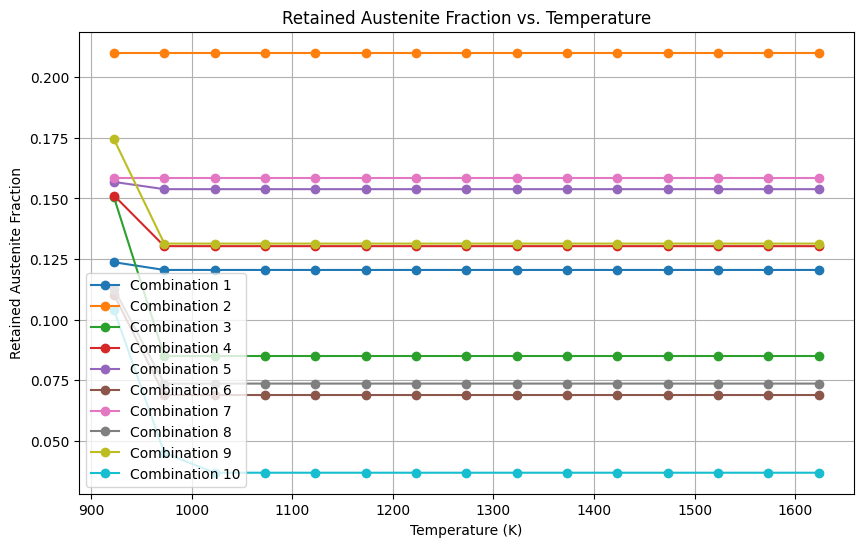

In [7]:
success = 0
all_ra_fractions = []
all_ms_temps = []
all_austenite_fractions = []
for combination in valid_combinations:
    ra_fractions = []
    ms_temps = []
    austenite_fractions = []
    for temp in temp_range:
            conditions = {
            v.N: total_moles,
            v.P: pressure,
            v.T: temp,
            v.X('C'): combination['C'],
            v.X('MN'): combination['MN'],
        }
            print(combination, temp)
            
            try:
                result = equilibrium(database, components, phases, conditions)
                austenite_fraction = result.NP.where(result.Phase == 'FCC_A1', drop = True).squeeze().values.item()
                ms_temp = get_ms_temp(result.X.sel(component='C').where(result.Phase == 'FCC_A1', drop=True).squeeze().values.item(), result.X.sel(component='MN').where(result.Phase == 'FCC_A1', drop=True).squeeze().values.item())
                martensite_fraction = get_martensite_fraction(ms_temp, 298)
                ra_fraction = get_ra_fraction(austenite_fraction, martensite_fraction)
                
                result_298K = equilibrium(database, components, phases, {v.N: total_moles, v.P: pressure, v.T: 298, v.X('C'): combination['C'], v.X('MN'): combination['MN']})
                g_fcc = result_298K.GM.where((result_298K.Phase == 'FCC_A1').any(dim='vertex'), drop=True).values.item() if result_298K.GM.where((result_298K.Phase == 'FCC_A1').any(dim='vertex'), drop=True).values.size > 0 else None
                g_hcp = result_298K.GM.where((result_298K.Phase == 'HCP_A3').any(dim='vertex'), drop=True).values.item() if result_298K.GM.where((result_298K.Phase == 'HCP_A3').any(dim='vertex'), drop=True).values.size > 0 else None
                #delta_g = g_hcp - g_fcc
                #sfe = get_sfe(delta_g)

                print(
                    "Austenite frac", austenite_fraction, 
                    "||", 
                    "MS temp", ms_temp, 
                    "||", 
                    "Martensite frac", martensite_fraction, 
                    "||", 
                    "RA frac", ra_fraction,
                    "||",
                    "delta G fcc", g_fcc, 
                    "||",
                    "delta G hcp", g_hcp,
                    "||",
                    #"SFE", sfe,
                    #"||",
                    "Phases at T", result.Phase.values.flatten(),
                    "||",
                    "Phases at 298K", result_298K.Phase.values.flatten(),
                    )
                
                ra_fractions.append(ra_fraction)
                ms_temps.append(ms_temp)
                austenite_fractions.append(austenite_fraction)
                success += 1
            except Exception as e:
                print("Exception: ", e)
    all_ra_fractions.append(ra_fractions)
    all_ms_temps.append(ms_temps)
    all_austenite_fractions.append(austenite_fractions)
print("Number of times everything worked = ", success)

plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(temp_range, all_ra_fractions[i], marker='o', linestyle='-', label=f'Combination {i+1}')

plt.xlabel('Temperature (K)')
plt.ylabel('Retained Austenite Fraction')
plt.title('Retained Austenite Fraction vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()